In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib.animation import FuncAnimation

In [3]:
def rect(x,a=1,b=0):
    return 1 if np.abs((x+b)/a) < 0.5 else 0

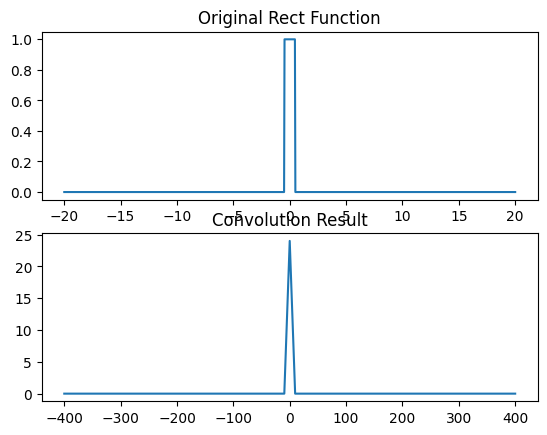

In [4]:
rect_vec = np.vectorize(rect)

x_points = np.linspace(-20,20,1000)
y_vals = rect_vec(x_points)

convolve_result = np.zeros(2*len(y_vals) - 1) # account for sliding operation

# for shift in np.linspace(-20 - len(y_vals)//2 + 1, 20 + len(y_vals)//2 - 1, 200):
for i in range(len(convolve_result)):
    sum_value = 0
    for j in range(len(y_vals)):
        if i - j < 0 or i - j >= len(y_vals):
            continue
        sum_value += y_vals[j] * y_vals[i - j]
    convolve_result[i] = sum_value

plt.figure()

plt.subplot(2,1,1)
plt.plot(x_points,y_vals)
plt.title('Original Rect Function')

# plot convolution result
plt.subplot(2,1,2)
conv_x_values = np.linspace(-400,400,len(convolve_result))
plt.plot(conv_x_values,convolve_result)
plt.title('Convolution Result')

plt.show()

## PS2.1b Check

In [5]:
# now i want to define the custom function in ps2.1
def f(x,a,b):
    return rect((x-b)/a) + rect((x+b)/a)

In [6]:
f_vec = np.vectorize(f)

In [7]:
def rect_plotter(a=1,b=0):
    x = np.linspace(-10,10,1000)
    y = f_vec(x,a,b)
    plt.plot(x,y)
    plt.ylim(-0.2,3)
    plt.show()

In [8]:
interact(rect_plotter, a=(0.01,10), b=(0.01,10))

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.01), FloatSlider(value=0.01, des…

<function __main__.rect_plotter(a=1, b=0)>

### Convolving the Function with Itself

In [9]:
xmin = -10
xmax = 10.0
nSteps = 1000
nFrames = 200
movieStepSize = (xmax - xmin)/ nFrames
computeStepSize = (xmax - xmin)/ nSteps

func1 = f_vec
func2 = f_vec

In [12]:
def make_convolution_plots(i=1, a=1, b=0):
    fig, axes = plt.subplots(3)
    axes[0].set_xlim([xmin-xmin*0.1, xmax*1.1])
    axes[1].set_xlim([xmin-xmin*0.1, xmax*1.1])
    axes[2].set_xlim([xmin-xmin*0.1, xmax*1.1])
    axes[0].set_ylim([-3, 3])
    axes[1].set_ylim([-3, 3])
    axes[2].set_ylim([-3, 3])

    line0, = axes[0].plot([], [], lw=3)
    line1, = axes[1].plot([], [], lw=3)
    line2, = axes[2].plot([], [], lw=3)

    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])

    z = movieStepSize * i + xmin

    x = np.linspace(xmin, xmax, nSteps)

    def conv(x):
        y = np.zeros(nSteps,)
        f= func1(x,a,b)
        
        for i in range(nSteps):
            z = i * computeStepSize + xmin
            g = func2(z-x,a,b)
            y[i] = np.sum (f*g) * computeStepSize
        return (y)
    
    fcg = conv(x)

    line0.set_data(x, func1(x,a,b))
    line1.set_data(x, func2(z-x,a,b))
    pos = (int)(i * nSteps / nFrames)
    line2.set_data(x[:pos ], fcg [:pos])

In [13]:
interact(make_convolution_plots,i=(0,nSteps),a=(0.01,10),b=(0.01,10))

interactive(children=(IntSlider(value=1, description='i', max=1000), FloatSlider(value=1.0, description='a', m…

<function __main__.make_convolution_plots(i=1, a=1, b=0)>